# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import optimize
from inauguralproject import HouseholdSpecializationModelClass
from types import SimpleNamespace
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

# Question 1

**1. Illustrate how HF/HM
changes when varying α ∈ {0.25, 0.50, 0.75} and σ = {0.5, 1.0, 1.5}.**

In [2]:
model = HouseholdSpecializationModelClass()

In [3]:
sigma_list = [0.5, 1, 1.5]
alpha_list = [0.25, 0.5, 0.75]
ratio_list = [] # create an empty list to store the results

for alpha in alpha_list:
    model.par.alpha = alpha
    for sigma in sigma_list:
        model.par.sigma = sigma 
        ratio_list.append(model.solve_discrete().HF / model.solve_discrete().HM) # append the ratio to the list


In [4]:
df = pd.DataFrame(np.array(ratio_list).reshape(3,3), index=sigma_list, columns=alpha_list)

cm = sns.light_palette('green', as_cmap=True) #create a color palette


df.style\
    .set_properties(**{'caption-side': 'bottom', 'font-size': '18pt', 'color': 'green', 'font-weight': 'bold'})\
    .set_caption(r'$\frac{H_F}{H_M}$'+'\n'+'for different values of '+r'$\alpha$'+' and '+r'$\sigma$')\
    .background_gradient(cmap=cm)\
    .format(precision=2)\
    .format_index(axis=0,precision=2)\
    .format_index(axis=1, precision=2)


,0.25,0.50,0.75
0.50,0.55,0.31,0.21
1.00,1.00,1.00,1.00
1.50,1.83,3.25,4.67


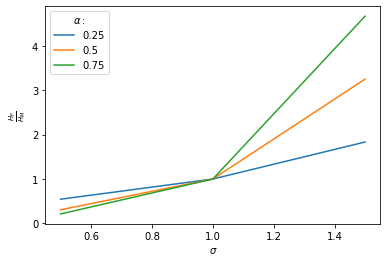

In [5]:
ax = df.plot() #assign the plot to ax
ax.set_xlabel(r'$\sigma$') #set the x-label
ax.set_ylabel(r"$\frac{H_F}{H_M}$")
ax.legend(title=r'$\alpha:$')



Using zip if the desired result should be presented as pair of values from the two lists:

In [6]:
'''sigma_list = [0.5, 1, 1.5]
alpha_list = [0.25, 0.5, 0.75]
ratio_list = [] # create an empty list to store the results
for sigma, alpha in zip(sigma_list, alpha_list): # zip creates pairs of values from two lists
    model.par.sigma = sigma
    model.par.alpha = alpha
    ratio_list.append(model.solve_discrete().HF / model.solve_discrete().HM) # append the ratio to the list
    
    print("sigma: {:}, alpha: {}".format(sigma, alpha))
    print("HF: {}, HM: {}".format(model.solve_discrete().HF, model.solve_discrete().HM ))
    print("Log Ratio of Hours Worked: {:.2f}".format((model.solve_discrete().HF / model.solve_discrete().HM)))
    print('\n')
    
    
plt.figure(dpi = 200)
sns.lineplot(x = alpha_list, y = ratio_list, color = 'orange');
scatter = sns.scatterplot(x = alpha_list, y = ratio_list, hue = sigma_list, s = 200,
                palette=['red', 'green', 'blue'],
                zorder = 2)

plt.xlabel(r'$\alpha$')
plt.ylabel(r"$\frac{H_F}{H_M}$")
plt.title(r"$\frac{H_F}{H_M}$ " 'vs. ' r'$\sigma$' ' & ' r'$\alpha$')
plt.legend(title=r'$\sigma:$')

plt.ylim(0,5)

# Add annotations to each point
for i in range(len(alpha_list)):
    scatter.annotate(f'({alpha_list[i]:.2f}, {ratio_list[i]:.2f}, {sigma_list[i]:.2f})', 
                     (alpha_list[i], ratio_list[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.show()

    '''
    

'sigma_list = [0.5, 1, 1.5]\nalpha_list = [0.25, 0.5, 0.75]\nratio_list = [] # create an empty list to store the results\nfor sigma, alpha in zip(sigma_list, alpha_list): # zip creates pairs of values from two lists\n    model.par.sigma = sigma\n    model.par.alpha = alpha\n    ratio_list.append(model.solve_discrete().HF / model.solve_discrete().HM) # append the ratio to the list\n    \n    print("sigma: {:}, alpha: {}".format(sigma, alpha))\n    print("HF: {}, HM: {}".format(model.solve_discrete().HF, model.solve_discrete().HM ))\n    print("Log Ratio of Hours Worked: {:.2f}".format((model.solve_discrete().HF / model.solve_discrete().HM)))\n    print(\'\n\')\n    \n    \nplt.figure(dpi = 200)\nsns.lineplot(x = alpha_list, y = ratio_list, color = \'orange\');\nscatter = sns.scatterplot(x = alpha_list, y = ratio_list, hue = sigma_list, s = 200,\n                palette=[\'red\', \'green\', \'blue\'],\n                zorder = 2)\n\nplt.xlabel(r\'$\x07lpha$\')\nplt.ylabel(r"$\x0crac{H_F}

---

# Question 2

Explain your code and procedure

In [7]:
model = HouseholdSpecializationModelClass() # Resetting Values for Sigma and Alpha.
wf_list = [0.8, 0.9, 1, 1.1, 1.2]
hours_ratio = []
for wage in wf_list: 
    model.par.wF = wage
    hours_ratio.append(np.log(model.solve_discrete().HF / model.solve_discrete().HM)) #appending the wages,


Giving that wM = 1, then I plot log(HF/HM) to log(wF)

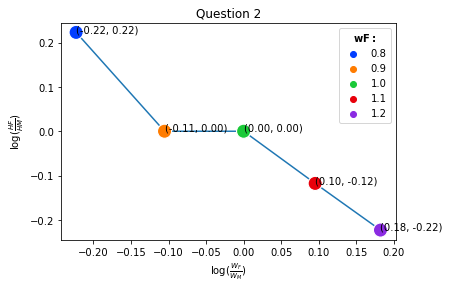

In [8]:
sns.lineplot(x=np.log(wf_list), y=hours_ratio)
sns.scatterplot(x = np.log(wf_list), y = hours_ratio,  hue = wf_list, s = 200, palette= 'bright',
               zorder = 2);

plt.xlabel(r"log($\frac{W_F}{W_M}$)");
plt.ylabel(r'log($\frac{HF}{HM}$)');

plt.legend(title=r'$\bf{wF:}$')

plt.title('Question 2')

for x, y in zip(np.log(wf_list), hours_ratio):
    plt.annotate(f'({x:.2f}, {y:.2f})', (x, y))

<h4>Interpretation of the results (Q2)</h4>

<p style=“font-size:16px;”>The figure and table above illustrate how the relative wage rate of women affects their optimal time allocation between home production and labor market. The graph has a constant linear slope, which indicates the elasticity of the input ratio of women and men in home production to the wage ratio. Both variables are log transformed for this purpose.</p>

<p style=“font-size:16px;”>When women earn more in the labor market relative to men, they tend to spend less time on home production and more time on earning income. This is because their opportunity cost of home production increases as they can buy more consumer goods with their higher wages. Conversely, men spend more time on home production as their relative wages decrease.</p>

<p style=“font-size:16px;”>The graph has a flat segment where the wage ratio does not affect the input ratio in home production. This is because the choice variables are discrete and can only take integer values.</p>

# Question 3

**We need to solve the model continously and not for discrete values of hours working**

In [9]:
model = HouseholdSpecializationModelClass() # 

In [10]:
HF_HM = []
log_wf_wm = []

# The vector of wages, we want to go through:
wF_vec = np.linspace(0.8,1.2,5) 


# solve the model for each value of the vector.
for i, w_F in enumerate(wF_vec):
    model.par.wF = w_F
    opt = model.solve()

    HF_HM.append(np.log(opt.HF/opt.HM))
    log_wf_wm.append(np.log(w_F)) 
    
    print("LM: {:.3f}, HM: {:.3f}, LF: {:.3f}, HF: {:.3f}".format(opt.LM, opt.HM, opt.LF, opt.HF))
    print("Maximum utility: {:.2f}".format(opt.u))
    print("wF: {:}".format(wage))
    print("Log Ratio of Hours Worked: {:.2f}".format(np.log(w_F)))
    print('\n')
    

LM: 5.889, HM: 4.093, LF: 2.869, HF: 5.116
Maximum utility: 0.25
wF: 1.2
Log Ratio of Hours Worked: -0.22


LM: 5.168, HM: 4.271, LF: 3.749, HF: 4.746
Maximum utility: 0.24
wF: 1.2
Log Ratio of Hours Worked: -0.11


LM: 4.454, HM: 4.454, LF: 4.454, HF: 4.454
Maximum utility: 0.24
wF: 1.2
Log Ratio of Hours Worked: 0.00


LM: 3.760, HM: 4.642, LF: 5.022, HF: 4.220
Maximum utility: 0.23
wF: 1.2
Log Ratio of Hours Worked: 0.10


LM: 3.090, HM: 4.833, LF: 5.480, HF: 4.027
Maximum utility: 0.23
wF: 1.2
Log Ratio of Hours Worked: 0.18




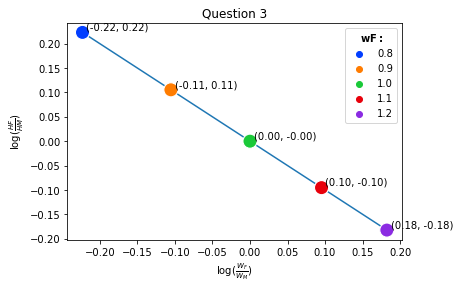

In [11]:
sns.lineplot(x=np.log(wf_list), y=HF_HM)
sns.scatterplot(x = np.log(wf_list), y = HF_HM,  hue = wf_list, s = 200, palette= 'bright',
               zorder = 2);

plt.xlabel(r"log($\frac{W_F}{W_M}$)");
plt.ylabel(r'log($\frac{HF}{HM}$)');

plt.legend(title=r'$\bf{wF:}$')

plt.title('Question 3')

for x, y in zip(np.log(wf_list), HF_HM):
    plt.annotate(f'({x:.2f}, {y:.2f})', (x+0.005, y+0.005))


<h4>Interpretation of (Q3)</h4>
<br>

<p style=“color:blue; font-size:18px;”>With the <b>choice variable</b> being continuous, the correlation between the <i>relative wage ratio</i> and <i>participation ratio in domestic tasks</i> can be represented by a constant linear slope. This slope reflects the elasticity of inputs in home production concerning the relative wage rate. As illustrated in the figure and table above, when women’s relative labor wage increases, their optimal participation in home production decreases.</p>

## Question 4

In [12]:
model = HouseholdSpecializationModelClass() #resetting parameters,

In [13]:
result = model.estimate()

In [14]:
result

 final_simplex: (array([[0.98201625, 0.09999592],
       [0.98201625, 0.09999592],
       [0.98201625, 0.09999592]]), array([7.57631360e-17, 1.05471620e-15, 1.12689534e-15]))
           fun: 7.576313600433451e-17
       message: 'Optimization terminated successfully.'
          nfev: 143
           nit: 69
        status: 0
       success: True
             x: array([0.98201625, 0.09999592])

#### Results from regression:

In [15]:
print(f'The squared error is minimized when:')
print(f' - alpha = {model.par.alpha:.3f}')
print(f' - sigma = {model.par.sigma:.3f}')
print()
print(f'At these values, our coefficients are:')
print(f' - beta_hat0 = {model.sol.beta0:.3f}')
print(f' - beta_hat1 = {model.sol.beta1:.3f}')
print()
print(f'The target values:')
print(f' - beta0 = {model.par.beta0_target:.3f}')
print(f' - beta1 = {model.par.beta1_target:.3f}')
print()

print('Therefore, the error must be 0:')
print(f'The minimized squared error is: {result.fun:.8f}')

The squared error is minimized when:
 - alpha = 0.982
 - sigma = 0.100

At these values, our coefficients are:
 - beta_hat0 = 0.400
 - beta_hat1 = -0.100

The target values:
 - beta0 = 0.400
 - beta1 = -0.100

Therefore, the error must be 0:
The minimized squared error is: 0.00000000


---

#### Plot to show how well the model fits the data:

In [ ]:
# We find the log H ratio 
ratio = np.log(model.sol.HF_vec/model.sol.HM_vec)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Ratio and the vector of wages.
ax.scatter(np.log(model.par.wF_vec),  
           ratio)

# Adding the regression. beta0 + beta1 * estimate  
ax.plot(np.log(model.par.wF_vec),model.sol.beta0+model.sol.beta1*np.log(model.par.wF_vec),
       color = 'black', label = 'Models predicition', linestyle = '--', lw = 4, alpha = 0.3)

# Using the original (true value) of beta0 and beta1
ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec),
       color = 'green', label = 'Original', alpha = 1, lw = 4, linestyle = ':')



# We set title and axis labels 
ax.set_title('Our Models preds versus the Papers')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

ax.legend(loc=0) ;

<h4>Interpretation of (Q4)</h4>
<br>


**Our findings suggest, there is zero deviation from the original paper. 
 The intuition is women must exhibit higher productivity in domestic tasks and their contributions must complement those of men.**

---

# Question 5

Based on empirical evidence, it has been established that modifying the model is necessary, given that **alpha = 0.5**. The model only effectively fits the data when alpha is 0.98 and sigma is 0.1. Imposing the constraint of alpha = 0.5 may result in a decline in performance. Consequently, it is essential to refine the model, and various strategies can be utilized to achieve this objective.

<br>
<br>

One approach is to incorporate children into the model, while another strategy is to include disutility when working either at home or in an office, which may depend on gender. For instance, **men may have a preference for working more** Hence, matching utility functions may no longer apply. 

<br>
<br>

In conclusion, the evidence suggests that modifying the model is essential to ensure optimal performance. Incorporating children into the model or adding disutility when working at home or in an office, depending on gender, are some of the strategies that can be employed to refine the model.


Ideas to modify the setup:<br>
 -'

#### The Model solved with Alpha = 0.5

In [17]:
model = HouseholdSpecializationModelClass()

In [18]:
result = model.estimate(alpha = 0.5)

In [19]:
result

 final_simplex: (array([[0.5       , 0.10048798],
       [0.5       , 0.10048798],
       [0.5       , 0.10048798]]), array([0.16001115, 0.16001115, 0.16001115]))
           fun: 0.1600111483861512
       message: 'Optimization terminated successfully.'
          nfev: 220
           nit: 85
        status: 0
       success: True
             x: array([0.5       , 0.10048798])

In [20]:
print(f'The squared error is minimized when:')
print(f' - alpha = {model.par.alpha:.3f}')
print(f' - sigma = {model.par.sigma:.3f}')
print()
print(f'The minimized squared error is: {result.fun:.8f}')

The squared error is minimized when:
 - alpha = 0.500
 - sigma = 0.100

The minimized squared error is: 0.16001115


#### We can see the model failed. 

---

#### Varying theta and sigma holding alpha = 0.5.

Theta is some variable, that affects the disutility for women. 

Therefore, we will now implement of the suggestions. We will add a parameter to the disutility the household gets from spending time working. More specifically, we will implement a paramter, that alters women disutility from working. More specifically, we have implemented nu ** theta. Where theta is the new parameter. When theta = 1, there is no difference. When Theta increases, then the disutility women experience when working decreases, since nu < 1. 

In [21]:
model = HouseholdSpecializationModelClass()

In [ ]:
result2 = model.estimate2()

In [ ]:
print(f'The squared error is minimized when:')
print(f' - theta = {model.par.theta:.3f}')
print(f' - sigma = {model.par.sigma:.3f}')
print()
print(f'The minimized squared error is: {result2.fun:.8f}')

#### The models performance is enhanched, but it is still worse than alpha = 1. Other extensions could've been explored that would've altered the results. One could've explored disutility when working from home varies on gender. This might have improved the model. 

In [ ]:
data = {
    'Model alpha = 0.5': ['Sigma', 'Sigma and Theta'],
    'MSE': [result.fun, result2.fun]
}

comparison_df = pd.DataFrame(data)

print(comparison_df)